In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# uci_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/\00292/Wholesale%20customers%20data.csv"
df = pd.read_csv("Wholesale customers data.csv", header = 0)

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
X = df.iloc[:, :]

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn import cluster
kmeans = cluster.KMeans(init = "k-means++", n_clusters = 5, n_init = 10) #모형 객체 생성
kmeans.fit(X) #모형 학습

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster_label = kmeans.labels_ #예측(군집)
cluster_label

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 4, 1,
       4, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 2, 4, 4, 1, 4, 1, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 1, 4, 1, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 4, 1, 1, 4, 1,

In [ ]:
df["Cluster"] = cluster_label #데이터프레임에 예측값 추가

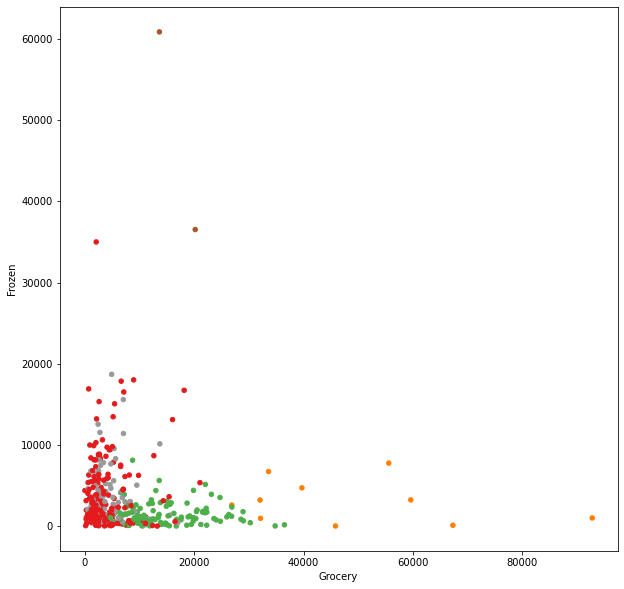

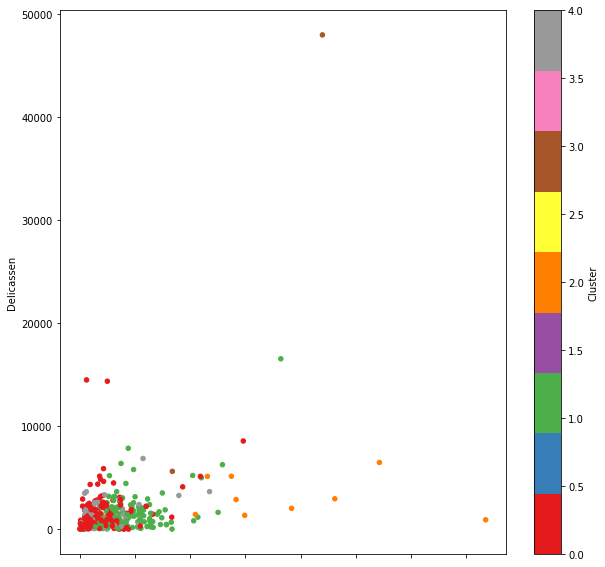

In [ ]:
#시각화
df.plot(kind = "scatter", x = "Grocery", y = "Frozen", c = "Cluster", cmap = "Set1", colorbar = False, figsize = (10, 10))
df.plot(kind = "scatter", x = "Milk", y = "Delicassen", c = "Cluster", cmap = "Set1", colorbar = True, figsize = (10, 10))
plt.show()
plt.close()

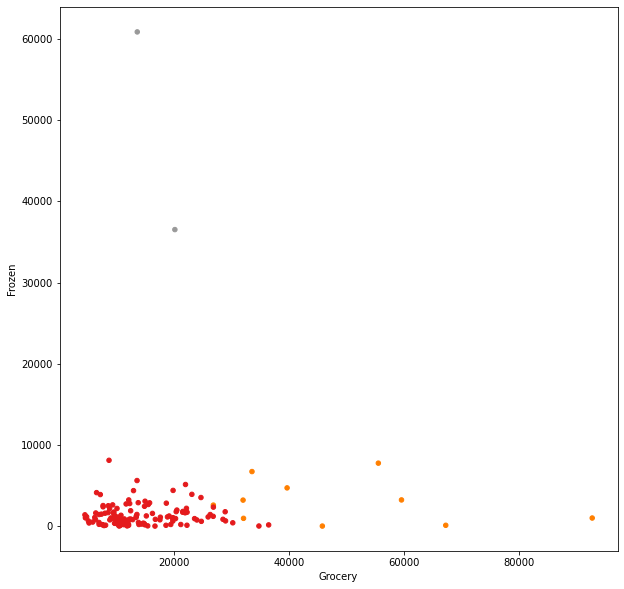

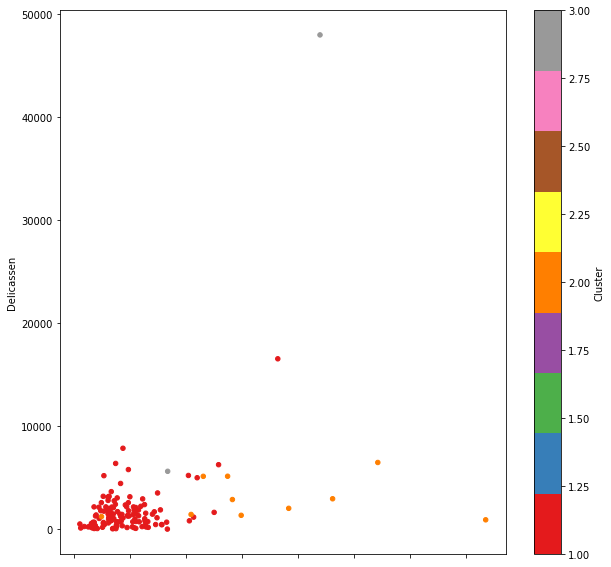

In [ ]:
#큰 값으로 구성도니 클러스터 (0, 4) 제외 - 값이 몰려있는 구간을 자세히 분석
mask = (df["Cluster"] == 0) | (df["Cluster"] == 4)
ndf = df[~mask]

ndf.plot(kind = "scatter", x = "Grocery", y = "Frozen", c = "Cluster", cmap = "Set1", colorbar = False, figsize = (10, 10))
ndf.plot(kind = "scatter", x = "Milk", y = "Delicassen", c = "Cluster", cmap = "Set1", colorbar = True, figsize = (10, 10))
plt.show()
plt.close()